 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 05 - Isolated digit recognition using Dynamic Time Warping (DTW) algorithm </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Dynamic Time Warping </b> <br>
We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation. 

In [3]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

**Part1**

In this part of the assignment, you need to code the DTW algorithm from scratch. 

1. Given two templates, Write a dynamic time warping algorithm to obtain the optimal distance between them.

> Compute the distance matrix between the two templates 


> Compute the accumulative distance matrix


> Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance   


> Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes



In [5]:
###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def distance_func(t1, t2):
  return np.linalg.norm(t1-t2)

def DTW(template1,template2): 
    #######################################################
    # Input  : Two templates 
    # Output : DTW path and optimal distance 
    #######################################################

    M = template1.shape[1]
    N = template2.shape[1]

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    D = np.zeros((M, N))
    for i in range(M):
      for j in range(N):
        D[i, j] = distance_func(template1[:, i], template2[:, j])
      
    DTW_cumulate_Matrix = np.ones((M, N))*np.inf # cummulative distance matrix
    P = np.zeros((M, N)).astype(int)
    DTW_cumulate_Matrix[0, 0] = D[0, 0]

    for i in range(1, M):
      DTW_cumulate_Matrix[i, 0] = D[i, 0] + DTW_cumulate_Matrix[i-1, 0]

    for j in range(1, N):
      DTW_cumulate_Matrix[0, j] = D[0, j] + DTW_cumulate_Matrix[0, j-1]

    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1, M): #you can start from 1 
        for j in range(1, N):
            current_distance = D[i, j]  # Compute the euclidean distance between the current feature vectors
            
            arr = np.array([DTW_cumulate_Matrix[i, j-1], DTW_cumulate_Matrix[i-1, j-1]], DTW_cumulate_Matrix[i-1, j])
            P[i, j] = np.argmin(arr)

            DTW_cumulate_Matrix[i, j] = current_distance + arr[P[i, j]]
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"

    # #######################################################
    # # Code snippet to find the optimal DTW path and the corresponding optimal distance
    # #######################################################

    i = M-1
    j = N-1
    path = [[i, j]]
    
    while i>0 and j>0:
      if i==0:
        j -= 1
      elif j==0:
        i -= 1
      else:
        if P[i, j] == 0:
          j -= 1
        elif P[i, j] == 1:
          j -= 1
          i -= 1
        else:
          i -= 1
      path.append([i, j])


    return path[::-1], DTW_cumulate_Matrix[M-1, N-1], P, D, DTW_cumulate_Matrix


    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################





def plotDTWpath(template1,template2):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix 
    #######################################################

    #Compute distance and cumulative distance between the given templates

    path, _, _, D, cum = DTW(template1, template2)
    px = [x[0] for x in path]
    py = [y[1] for y in path]
    #Obtain the optimal path using "DTW" function
    plt.figure()
    plt.title("Distance matrix")
    plt.imshow(D, interpolation="nearest", cmap="Reds")
    plt.gca().invert_yaxis()
    plt.xlabel("template 2")
    plt.ylabel("template 1")
    plt.plot(py, px, "-*")
    plt.grid()
    plt.colorbar();


    plt.figure()
    plt.title("Cummulative matrix")
    plt.imshow(cum, interpolation="nearest", cmap="Reds")
    plt.gca().invert_yaxis()
    plt.xlabel("template 2")
    plt.ylabel("template 1")
    plt.plot(py, px, "-*")
    plt.grid()
    plt.colorbar();

    #Plot the optimal path on distance and cumulative matrices and verify the DTW code

In [6]:
def DTW_viv(template1,template2): 
   #######################################################
    # Input  : Two templates 
    # Output : DTW path and optimal distance 
    #####################################################          

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################

    # Create initial cumulative distance matrix
    DTW_cumulate_Matrix =  np.zeros((len(template1)+1,len(template2)+1))  # cummulative distance matrix
    for i in range(len(template1)+1):
      DTW_cumulate_Matrix[i,0] = np.inf
    for i in range(len(template2)+1):
      DTW_cumulate_Matrix[0,i] = np.inf
    DTW_cumulate_Matrix[0,0] = 0    
    # Iterate through the sequence of features in templates. Compute the measure ( "euclidean distance" or "cosine distance" ) 
    for i in range(1,len(template1)+1,1): #you can start from 1 
        for j in range(1,len(template2)+1,1):   
            euclidean_dist = np.linalg.norm((template1[i-1]-template2[j-1]),2) # Compute the euclidean distance  of feature vectors  Template1[i] and Template2[j]
            mini = min(DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i,j-1])
            DTW_cumulate_Matrix[i,j] = euclidean_dist + mini      
            #Add the minimum distance in euclidean measure ( or maximum similarity in cosine scoring ) of ( DTW_cumulate_Matrix[i-1,j] , DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1] ) to "current_measure" and assign it to "DTW_cumulate_Matrix"



    #######################################################
    # Code snippet to find the dtw path and optimal distance
    #######################################################

    i =  len(template1)# length of reference template1
    j =  len(template2)# length of test template2
    opt_distance = DTW_cumulate_Matrix[i,j]
    optimal_path = []
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among ( DTW_cumulate_Matrix[i-1,j] , DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1] )
        #you may use "np.argmin for eucludian ( or np.argmax for cosine ) " function for doing it
        optimal_path.append([i,j])
        # Add the current indexes distance

        # Store the i,j th index which gives the optimal dtw path
        if DTW_cumulate_Matrix[i-1,j-1] <= DTW_cumulate_Matrix[i-1,j] and DTW_cumulate_Matrix[i-1,j-1] <= DTW_cumulate_Matrix[i,j-1]:
          i=i-1
          j=j-1
        elif DTW_cumulate_Matrix[i-1,j] <= DTW_cumulate_Matrix[i-1,j-1] and DTW_cumulate_Matrix[i-1,j] <= DTW_cumulate_Matrix[i,j-1]:
          i = i-1
        else:
          j = j-1 

        # compute either "euclidean distance" or "cosine similarity" of feature vectors  MFCC1[i] and MFCC2[j]
    return opt_distance,DTW_cumulate_Matrix,optimal_path

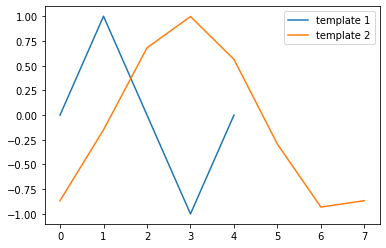

In [22]:
# t1 = np.array([3, 1, 2, 2, 1])
# t2 = np.array([2, 0, 0, 3, 3, 1, 0])

n = 5
x = np.linspace(0, 1, n)
t1 = np.sin(2*np.pi*x)
x = np.linspace(0, 1, n+3)
t2 = np.sin(2*np.pi*x - np.pi/3)

plt.figure()
plt.plot(t1, label="template 1")
plt.plot(t2, label="template 2")
plt.legend()
plt.show()


path, opt_dist, p, D, cum = DTW(t1.reshape(1, -1), t2.reshape(1, -1))

In [23]:
opt_distance,DTW_cumulate_Matrix,optimal_path = DTW_viv(t1.reshape(-1, 1), t2.reshape(-1, 1))

In [26]:
print(opt_dist == opt_distance)

True


In [25]:
print(np.sum(np.logical_not(np.array(optimal_path[::-1]) - 1 == np.array(path))))
print()

1



<ipython-input-25-05595c5b43af>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.sum(np.logical_not(np.array(optimal_path[::-1]) - 1 == np.array(path))))


In [27]:
np.array(optimal_path[::-1]) - 1

array([[0, 0],
       [0, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 5],
       [3, 6],
       [4, 7]])

In [28]:
np.array(path)

array([[0, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 5],
       [3, 6],
       [4, 7]])


**Part2**

In this part of the assignment, we expect you to build the isolated digit recognition system with the help of the above written DTW algorithm 

1. Record one repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.
2. Record three further repetitions of the same digits (isolated words) as test data.  
3. The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.   
4. Write an algorithm to perform isolated word recognition with the help of the DTW codes
5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   
6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. 
7. Create a confusion matrix and report the most confusing digits. 


**Module to record the voice in online mode**

In [1]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration. 
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.


**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

In [ ]:
import scipy.io.wavfile as wav
def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

**Algorithm to perform isolated digit recognition**

**Plot the optimal DTW path**

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**


**Part3**

In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  
1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy.
2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. 
3. Please report some of the changes to improve the system performance.

In [ ]:
## Example code to load wavefiles from drive
from google.colab import drive
import os
import soundfile as sf

drive.mount('/content/drive')
bacground_data_location='/content/drive/My Drive/PRML_Assignments/Programming_Assignment_05/data/digits_data/' #Change this location
bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             bacground_data_files.append(os.path.join(root, file))
bacground_data_files = np.array(bacground_data_files)

## Iterate through the files and load them using "sig,sr = sf.read(filename)""
